In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [7]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.drop(columns="Unnamed: 0",inplace =True)

In [9]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
df.shape

(30, 2)

In [11]:
df['YearsExperience'].unique()

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.8,  4. ,  4.1,
        4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,  8. ,  8.3,
        8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [12]:
df['YearsExperience'].nunique()

28

In [13]:
df['YearsExperience'].value_counts(normalize=True).head(10)

YearsExperience
3.3     0.066667
4.1     0.066667
1.2     0.033333
5.4     0.033333
10.4    0.033333
9.7     0.033333
9.6     0.033333
9.1     0.033333
8.8     0.033333
8.3     0.033333
Name: proportion, dtype: float64

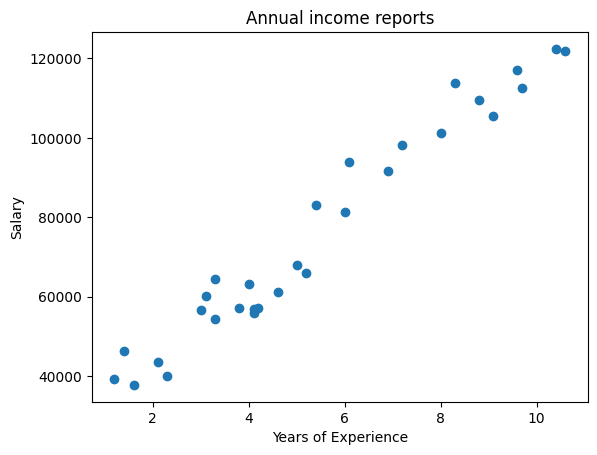

In [14]:
plt.scatter(x ="YearsExperience", y="Salary",data =df )
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Annual income reports")
plt.show()

In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


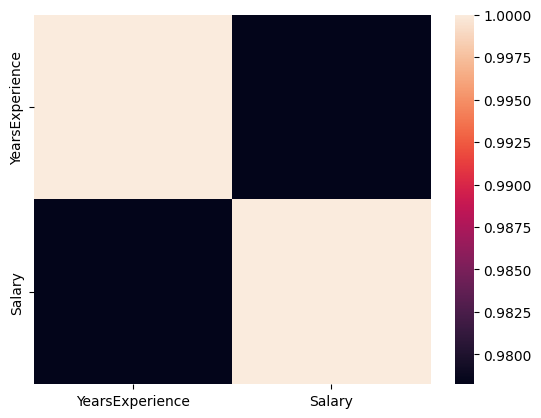

In [16]:
sns.heatmap(df.corr())
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


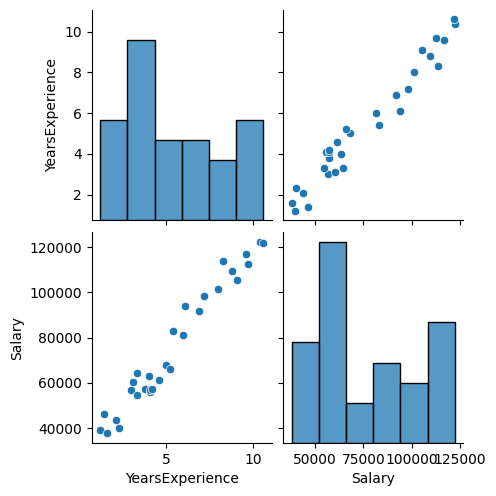

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
x = df[["YearsExperience"]]
y = df[["Salary"]]

In [19]:
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [20]:
y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.head()

,YearsExperience
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3


In [23]:
x_test.head()

,YearsExperience
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3


In [24]:
y_train.head()

,Salary
28,122392.0
24,109432.0
12,56958.0
0,39344.0
4,39892.0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [27]:
x_test_scaled = scaler.fit_transform(x_train)
x_test_scaled

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
Rl = LinearRegression(n_jobs=1)

In [30]:
Rl.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [31]:
print("Coefficent/Slope:",Rl.coef_)
print("\nintercept:",Rl.intercept_)

Coefficent/Slope: [[9423.81532303]]

intercept: [24380.20147947]


In [32]:
x_pred= Rl.predict(x_train)
x_pred

array([[122387.880839  ],
       [107309.77632215],
       [ 63017.8443039 ],
       [ 35688.77986711],
       [ 46054.97672244],
       [ 73384.04115923],
       [ 52651.64744857],
       [ 63960.2258362 ],
       [ 63017.8443039 ],
       [ 99770.72406372],
       [ 37573.54293172],
       [ 39458.30599632],
       [110136.92091906],
       [ 44170.21365784],
       [ 92231.6718053 ],
       [114848.82858057],
       [ 80923.09341766],
       [124272.6439036 ],
       [ 89404.52720839],
       [ 55478.79204548],
       [ 62075.4627716 ],
       [ 67729.75196542],
       [ 81865.47494996],
       [ 53594.02898087]])

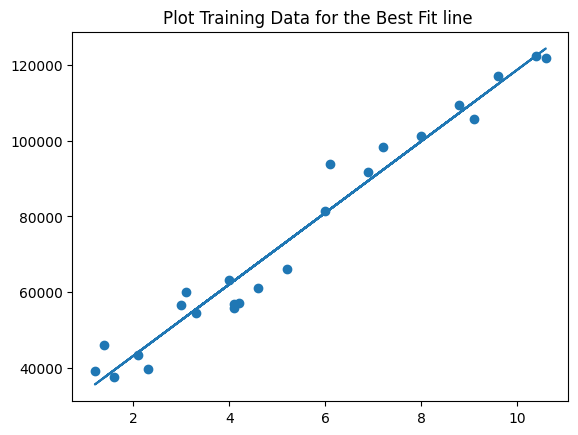

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Rl.predict(x_train))
plt.title("Plot Training Data for the Best Fit line ")
plt.show ()

In [34]:
y_pred = Rl.predict(x_test)
y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

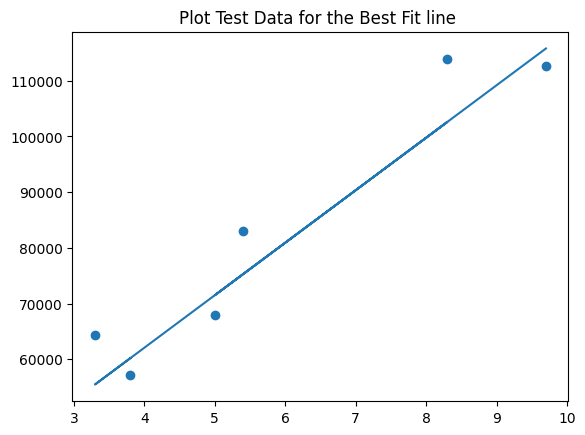

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Rl.predict(x_test))
plt.title("Plot Test Data for the Best Fit line ")
plt.show ()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("\nMean Absolute Error:", mae)
print("\nRoot Mean Sqaured Error:", rmse)

Mean Squared Error: 49830096.855908394

Mean Absolute Error: 6286.453830757745

Root Mean Sqaured Error: 7059.04362190151


In [38]:
from sklearn.metrics import r2_score

In [39]:
score =  r2_score(y_test, y_pred)
print("r2_score:", score)

r2_score: 0.9024461774180497


In [40]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.878057721772562

In [41]:
import statsmodels.api as sm
model = sm.OLS(x_train, y_train).fit()
model

In [42]:
prediction= model.predict(x_test)
prediction

27    0.000728
15    0.000375
23    0.000623
17    0.000405
8     0.000248
9     0.000285
dtype: float64

In [43]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              860.9
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                    9.95e-20
Time:                        08:18:32   Log-Likelihood:                         -33.356
No. Observations:                  24   AIC:                                      68.71
Df Residuals:                      23   BIC:                                      69.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------